In [ ]:
import random

def print_board(board):
    """Print the current state of the board."""
    for row in board:
        print(" | ".join(row))
        print("-" * 5)

def check_winner(board, player):
    """Check if the given player has won."""
    # Check rows, columns, and diagonals
    for row in board:
        if all(cell == player for cell in row):
            return True
    for col in range(3):
        if all(row[col] == player for row in board):
            return True
    if all(board[i][i] == player for i in range(3)) or all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def is_tie(board):
    """Check if the game is a tie."""
    return all(cell != " " for row in board for cell in row)

def get_empty_cells(board):
    """Get a list of empty cells."""
    return [(r, c) for r in range(3) for c in range(3) if board[r][c] == " "]

def ai_move(board):
    """Make a move for the AI."""
    empty_cells = get_empty_cells(board)
    return random.choice(empty_cells)

def main():
    """Main game loop."""
    board = [[" " for _ in range(3)] for _ in range(3)]  # Initialize empty board
    players = ["X", "O"]
    current_player = 0  # 0 = Human, 1 = AI

    print("Welcome to Tic-Tac-Toe!")
    print_board(board)

    while True:
        if current_player == 0:  # Human player
            move = input("Enter your move (row and column as 'row,col'): ")
            try:
                row, col = map(int, move.split(","))
                if board[row][col] == " ":
                    board[row][col] = players[current_player]
                else:
                    print("Cell is already occupied. Try again.")
                    continue
            except (ValueError, IndexError):
                print("Invalid input. Enter row and column as 'row,col' (e.g., 0,1).")
                continue
        else:  # AI player
            print("AI is making its move...")
            row, col = ai_move(board)
            board[row][col] = players[current_player]

        print_board(board)

        # Check for a winner or tie
        if check_winner(board, players[current_player]):
            print(f"Player {players[current_player]} wins!")
            break
        elif is_tie(board):
            print("It's a tie!")
            break

        # Switch players
        current_player = 1 - current_player

if __name__ == "__main__":
    main()


Welcome to Tic-Tac-Toe!
  |   |  
-----
  |   |  
-----
  |   |  
-----
Enter your move (row and column as 'row,col'): 0,1
  | X |  
-----
  |   |  
-----
  |   |  
-----
AI is making its move...
  | X |  
-----
  |   |  
-----
  | O |  
-----
Enter your move (row and column as 'row,col'): 0,0
X | X |  
-----
  |   |  
-----
  | O |  
-----
AI is making its move...
X | X |  
-----
  | O |  
-----
  | O |  
-----
Enter your move (row and column as 'row,col'): 1,0
X | X |  
-----
X | O |  
-----
  | O |  
-----
AI is making its move...
X | X |  
-----
X | O |  
-----
O | O |  
-----
Enter your move (row and column as 'row,col'): 1,1
Cell is already occupied. Try again.
Enter your move (row and column as 'row,col'): 2,1
Cell is already occupied. Try again.
Enter your move (row and column as 'row,col'): 3,1
Invalid input. Enter row and column as 'row,col' (e.g., 0,1).
Enter your move (row and column as 'row,col'): 1,2
X | X |  
-----
X | O | X
-----
O | O |  
-----
AI is making its move...

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file


path ="/content/drive/MyDrive/DataSets/company_sales_data.csv"
df = pd.read_csv(path)


# Check if the data is loaded correctly
print(df.head())




   month_number  facecream  facewash  toothpaste  bathingsoap  shampoo  \
0             1       2500      1500        5200         9200     1200   
1             2       2630      1200        5100         6100     2100   
2             3       2140      1340        4550         9550     3550   
3             4       3400      1130        5870         8870     1870   
4             5       3600      1740        4560         7760     1560   

   moisturizer  total_units  total_profit  
0         1500        21100        211000  
1         1200        18330        183300  
2         1340        22470        224700  
3         1130        22270        222700  
4         1740        20960        209600  


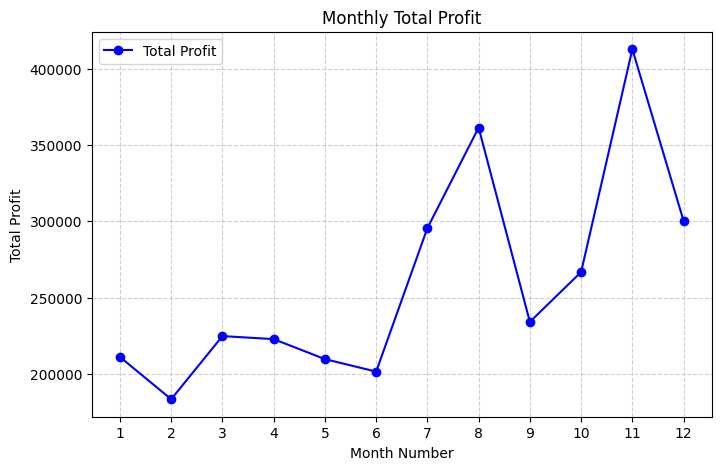

In [3]:
#Exercise 1: Line plot for Total profit of all months
months = df['month_number']
total_profit = df['total_profit']

plt.figure(figsize=(8, 5))
plt.plot(months, total_profit, marker='o', color='b', label='Total Profit')
plt.title('Monthly Total Profit')
plt.xlabel('Month Number')
plt.ylabel('Total Profit')
plt.xticks(months)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


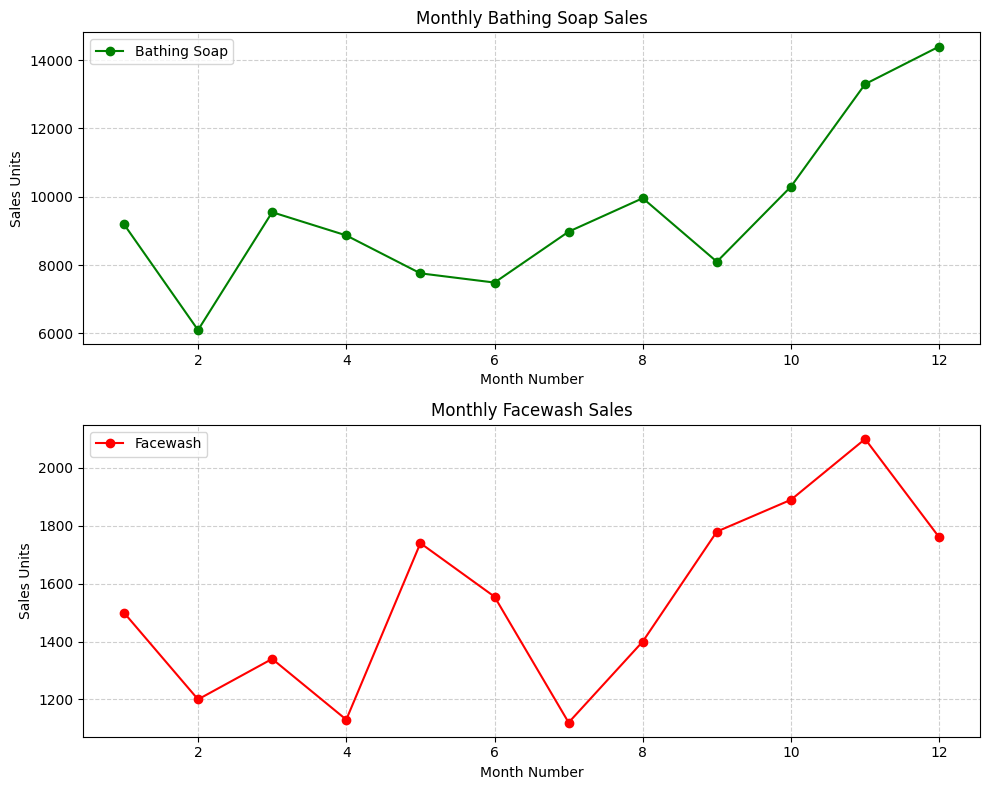

In [4]:
# Exercise 2: Subplots for Bathing soap and Facewash sales
bathing_soap_sales = df['bathingsoap']
facewash_sales = df['facewash']

fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Subplot 1: Bathing soap sales
ax[0].plot(months, bathing_soap_sales, marker='o', color='g', label='Bathing Soap')
ax[0].set_title('Monthly Bathing Soap Sales')
ax[0].set_xlabel('Month Number')
ax[0].set_ylabel('Sales Units')
ax[0].grid(True, linestyle='--', alpha=0.6)
ax[0].legend()

# Subplot 2: Facewash sales
ax[1].plot(months, facewash_sales, marker='o', color='r', label='Facewash')
ax[1].set_title('Monthly Facewash Sales')
ax[1].set_xlabel('Month Number')
ax[1].set_ylabel('Sales Units')
ax[1].grid(True, linestyle='--', alpha=0.6)
ax[1].legend()
plt.tight_layout()
plt.show()